In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [2]:
Hs  = [1577.172649,3625.079706,5947.503315,8562.446988,11088.02692,13193.61558,14955.40476]
n0s = [560.5089496,255.0134372,156.5810567,108.2497667,82.71713831,68.58166242,59.80914228]

In [6]:
# 调用线性回归模型并在 ax 上绘图(数据处理)
def regression(xs,ys,ax,fig,c):
    print(xs);print(ys)
    xs = np.array(xs); ys = np.array(ys)
    #自定义函数 e指数形式
    def func(x, a, b, c, d):
        return a#a*np.log(b*x+c)+d
    #非线性最小二乘法拟合
    popt, pcov = curve_fit(func, xs, ys)
    #获取popt里面是拟合系数
    a = popt[0]; b = popt[1]; c = popt[2]; d = popt[3]    
        
    length = np.max(xs) - np.min(xs)
    min_1 = np.min(xs) - (length)*0.03; max_1 = np.max(xs) + (length)*0.03
    xs_hat = np.append(xs,min_1); xs_hat = np.append(xs_hat,max_1)
    ys_hat = func(xs_hat,a,b,c,d) # 计算 ys_hat

    ax.plot(xs_hat, ys_hat, c='r', alpha =0.6, linewidth=1)


[560.5089496, 255.0134372, 156.5810567, 108.2497667, 82.71713831, 68.58166242, 59.80914228]
[1577.172649, 3625.079706, 5947.503315, 8562.446988, 11088.02692, 13193.61558, 14955.40476]


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


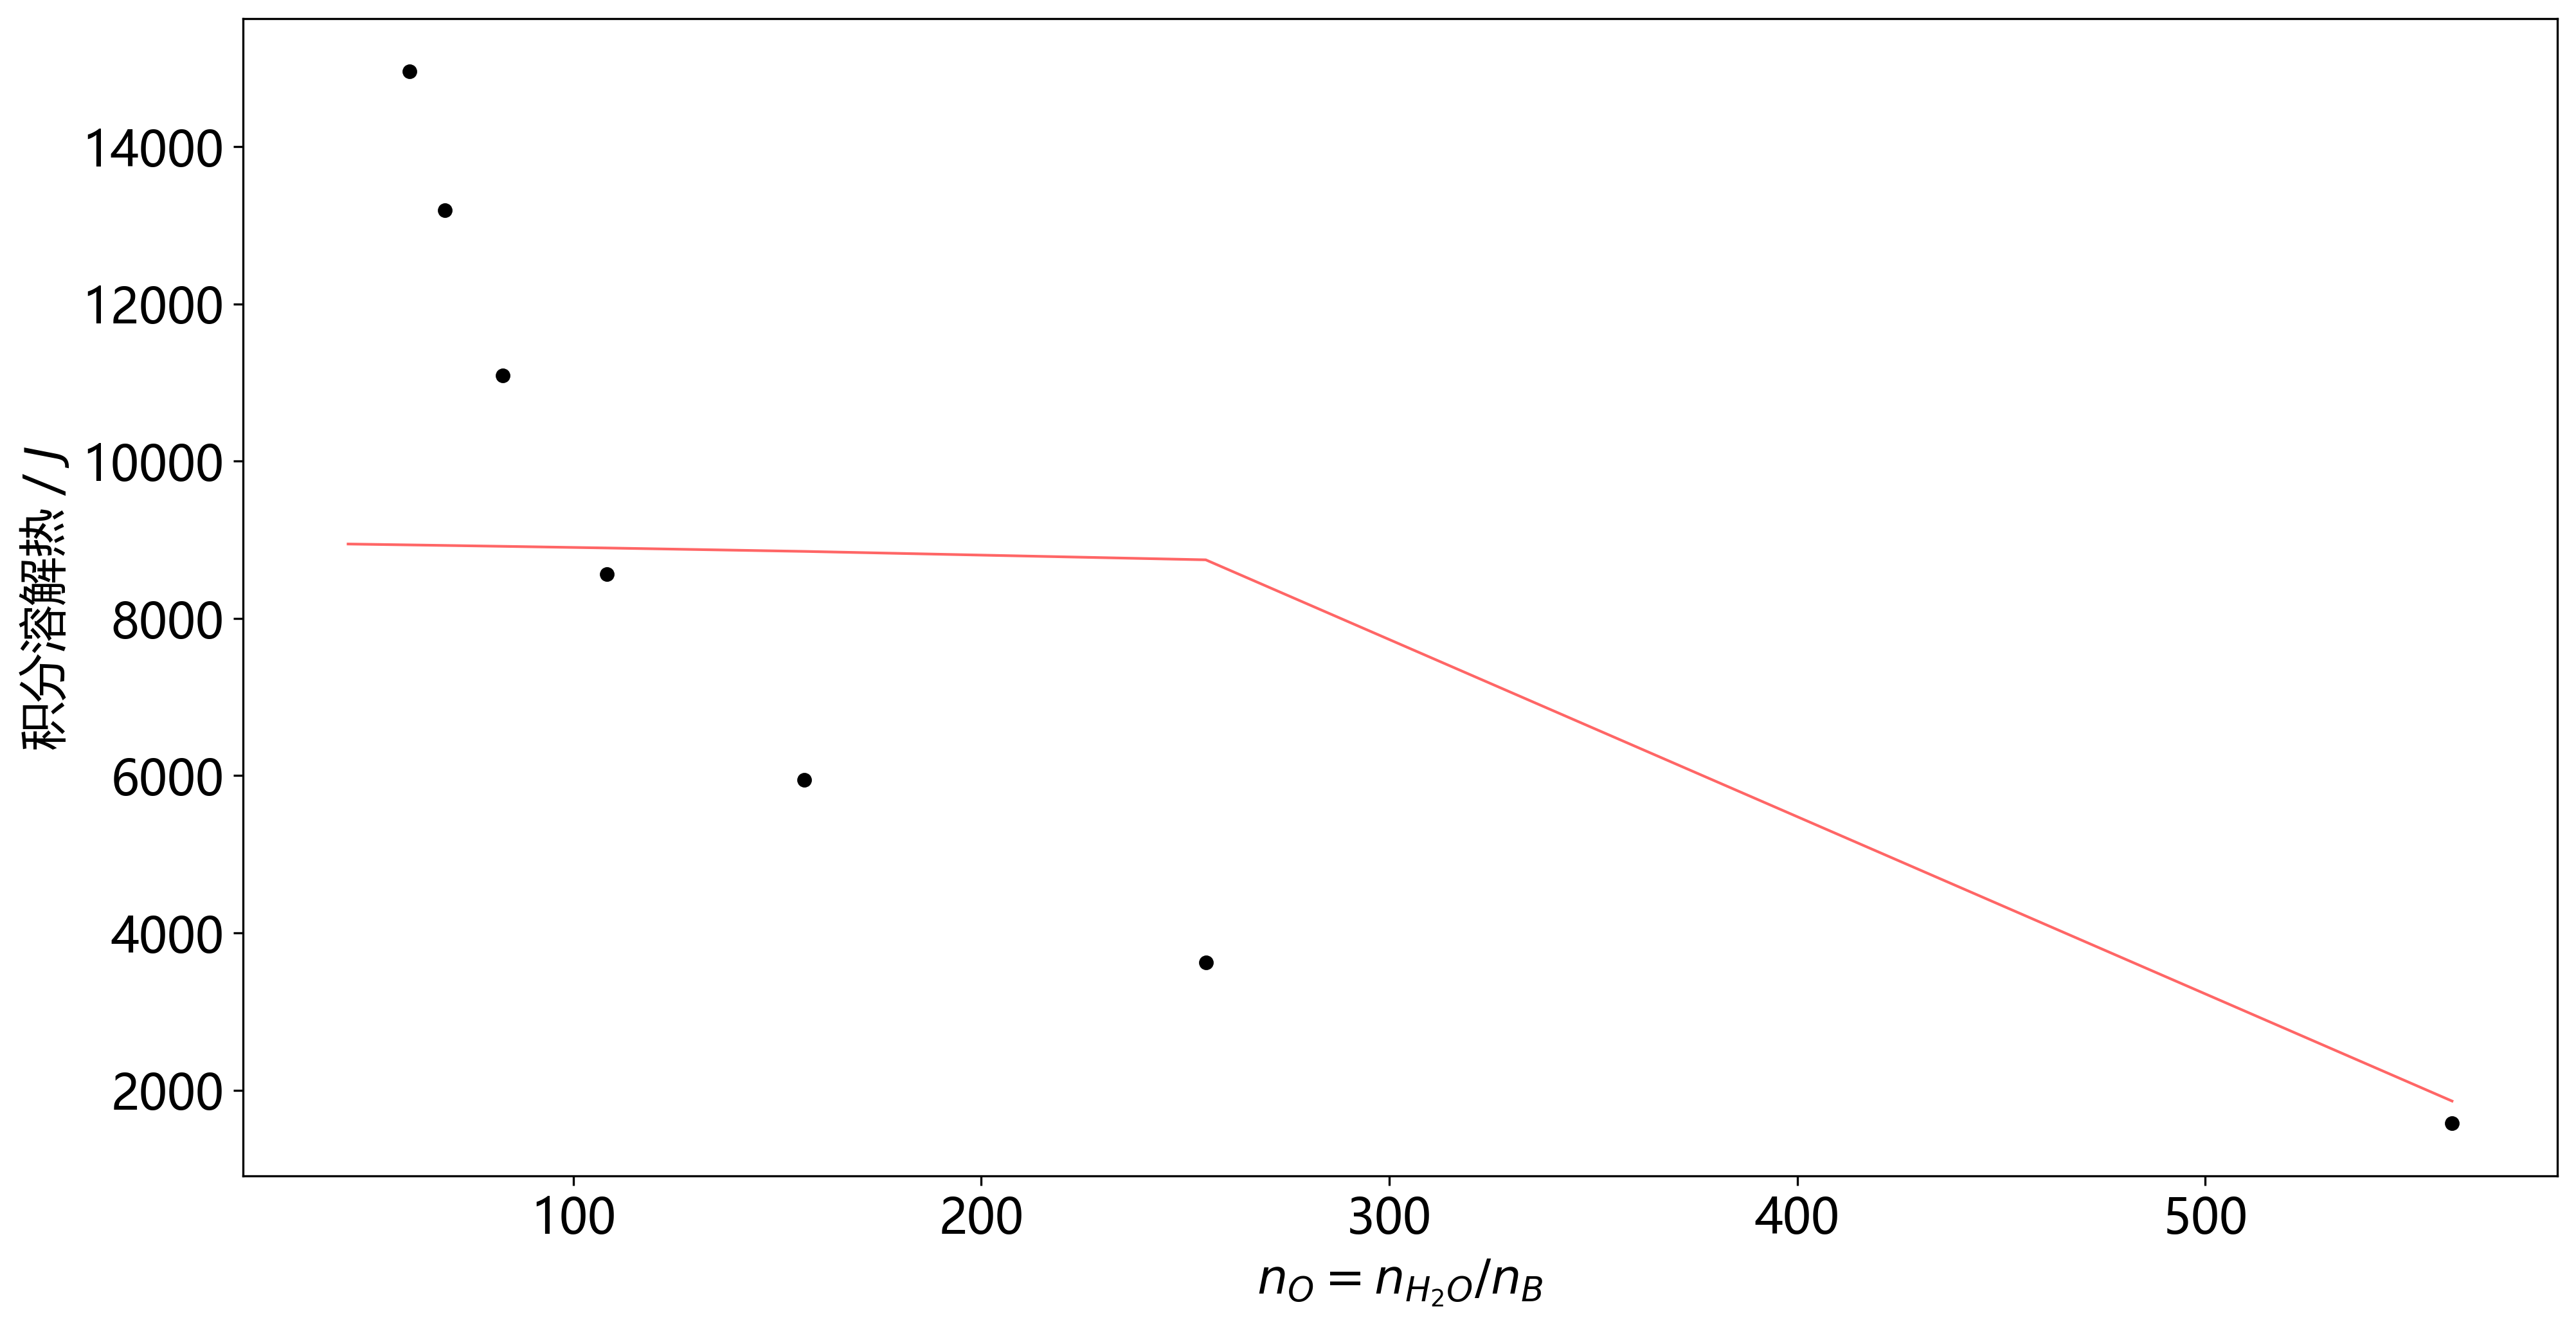

In [7]:
##  \Delta_{sol}H_m - n0
left, width = 0.1, 1; bottom, height = 0.1, 1; spacing = 0.1
rect = [left*0, bottom, width, height]; rect_text = [left + width*0.45, bottom+height*0.7]
fig1 = plt.figure(figsize=(12,6)); ax1 = fig1.add_axes(rect)
plt.rcParams['figure.dpi'] = 300 # 每英寸点数
plt.rcParams['font.size'] = 18

ax1.scatter(n0s,Hs,c='k',s=20)
ax1.set_xlabel('$n_O = n_{H_2O}/n_B$'); ax1.set_ylabel('积分溶解热 / $J$')
regression(xs=n0s,ys=Hs,ax=ax1,fig=fig1,c='r') # y_hat = kx+b
plt.savefig('积分溶解热 - n_0',bbox_inches='tight')